In [30]:
# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

In [34]:
import numpy as np

class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])
            dataset_X.append(features)
        
        dataset_Y.append([code2idx[subset[window_size]]])
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1]])
    return features

code2scale = {'c':0, 'd':1, 'e':2, 'f':3, 'g':4, 'a':5, 'b':6}

code2length = {'4':0, '8':1}

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

max_scale_value = 6.0

In [35]:
# prepare dataset

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

x_train, y_train = seq2dataset(seq, window_size = 4)

print(x_train.shape)
print(y_train.shape)

(200, 2)
(50, 1)


In [36]:
#### prepare train & test set

# reshape train input to (num_samples, timestep, features)
x_train = np.reshape(x_train, (50,4,2)) 

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [37]:
# train by LSTM model

model = Sequential()
model.add(LSTM(128, batch_input_shape=(1,4,2), stateful=True)) # batches, timestep, features
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = LossHistory()
history.init()

num_epochs = 1000
for epoch_idx in range(num_epochs):
    print('epochs : ' + str(epoch_idx))
    model.fit(x_train,y_train, epochs=1, batch_size=1, verbose=2, 
              shuffle=False, callbacks=[history])
    model.reset_states()

epochs : 0
Epoch 1/1
 - 2s - loss: 2.3068 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 0s - loss: 2.0179 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9619 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9461 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9359 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 0s - loss: 1.9284 - acc: 0.3400
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9223 - acc: 0.3400
epochs : 7
Epoch 1/1
 - 0s - loss: 1.9171 - acc: 0.3400
epochs : 8
Epoch 1/1
 - 0s - loss: 1.9122 - acc: 0.3600
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9073 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9017 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 0s - loss: 1.8941 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.8816 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 1s - loss: 1.8675 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 0s - loss: 1.8533 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 1s - loss: 1.8388 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 0s - loss: 1.8179 - acc: 0.3600
epochs : 17
Epoch 1/1
 - 0s - loss: 1.877

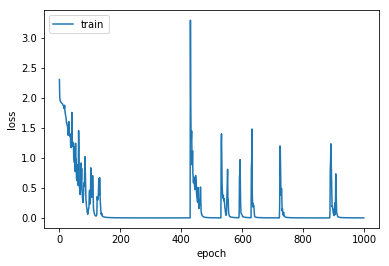

In [38]:
# visualize train process
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [39]:
# one-step predict with MLP model

pred_count = 50 
seq_out = ['g8', 'e8', 'e4', 'f8'] # first 4 elems
pred_out = model.predict(x_train, batch_size=1)
for i in range(pred_count):
    idx = np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])
model.reset_states()    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [44]:
# full-song predict with MLP model

seq_in = ['g8', 'e8', 'e4', 'f8'] # first 4 elems
seq_out = seq_in
seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)
    
for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
